<a href="https://colab.research.google.com/github/josephalanis/ADS/blob/main/HW7_Math_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

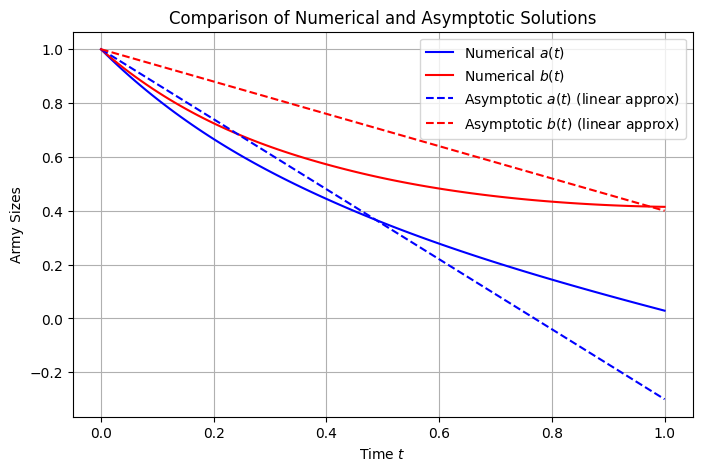

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
beta = 1.3
sigma = 0.8
alpha = 0.6

# Define the system of ODEs
def battle_system(t, y):
    a, b = y
    da_dt = -beta * b - sigma * a * b
    db_dt = -alpha * a - (1 / sigma) * a * b
    return [da_dt, db_dt]

# Initial conditions
a0, b0 = 1, 1
t_span = (0, 1)  # Solve from t=0 to t=1
t_eval = np.linspace(0, 1, 100)  # Time points for evaluation

# Solve numerically using Runge-Kutta method (RK45)
sol = solve_ivp(battle_system, t_span, [a0, b0], t_eval=t_eval, method='RK45')

# Extract numerical solutions
t_vals = sol.t
a_numerical = sol.y[0]
b_numerical = sol.y[1]

# Compute asymptotic solutions (linear approximations)
a_asymptotic = 1 - beta * t_vals
b_asymptotic = 1 - alpha * t_vals

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.plot(t_vals, a_numerical, 'b-', label='Numerical $a(t)$')
plt.plot(t_vals, b_numerical, 'r-', label='Numerical $b(t)$')
plt.plot(t_vals, a_asymptotic, 'b--', label='Asymptotic $a(t)$ (linear approx)')
plt.plot(t_vals, b_asymptotic, 'r--', label='Asymptotic $b(t)$ (linear approx)')
plt.xlabel('Time $t$')
plt.ylabel('Army Sizes')
plt.legend()
plt.title('Comparison of Numerical and Asymptotic Solutions')
plt.grid()
plt.show()